# **Instituto Tecnológico Vale**

## **Introdução a Visão Computacional**

### **Aula 06 - Reconhecimento de imagem**

## **Exemplo prático**

Criação e treinamento de rede neural com Pytorch

In [ ]:
# Importação das bibliotecas

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms

torch.__version__

'1.9.0+cu102'

### Funções auxiliares para a execução

In [ ]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.5, 0.5, 0.5])
        std = np.array([0.5, 0.5, 0.5])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

### Base de dados

In [ ]:
# Especificando o transformador das imagens para o formato específico do pytorch

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

In [ ]:
# baixando o dataset de imagens FashionMNIST

# Download and load the training data
trainset = datasets.FashionMNIST('.', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('.', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
# verificando o primeiro registro dos dados
trainset.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [ ]:
# Verificando a quantidade e formato dos dados
trainset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
# Verificando os valores targets (Classe)
trainset.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

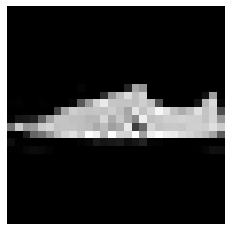

In [ ]:
# Visualizando uma imagem percorrendo o dataloader
# (1, 1, 28, 28)

image, label = next(iter(trainloader))
imshow(image[0,:]);

Label	| Description

0	    | T-shirt/top

1	    | Trouser

2	    | Pullover

3	    | Dress

4	    | Coat

5	    | Sandal

6	    | Shirt

7	    | Sneaker

8	    | Bag

9	    | Ankle boot

### Criando uma rede neural

In [ ]:
# Criação da classe queno formato especificado pelo pytorch
# Classifier é o nome escolhido para a o objeto

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()

        # Camadas lineares para as conexões
        self.fc1 = nn.Linear(784, 256) # camada intermediaria 1
        self.fc2 = nn.Linear(256, 128) # camada intermediaria 2
        self.fc3 = nn.Linear(128, 64)  # camada intermediaria 3
        self.fc4 = nn.Linear(64, 10)   # camada de saida


    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x)) # Aplciação da função relu apos o somatório linear
        x = F.relu(self.fc2(x)) # Aplciação da função relu apos o somatório linear
        x = F.relu(self.fc3(x)) # Aplciação da função relu apos o somatório linear

        x = self.fc4(x)         # Não é necessário aplicação da função de ativação na última camada, pois iremos calcular as probabilidades com esta saída
        
        return x

In [ ]:
# Criando objeto da estrutura da rede

net = Classifier()
print(net)

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
# Onde estão os pesos da rede?

print(net.fc1.weight)
print(' ')
print(net.fc1.weight.shape)

Parameter containing:
tensor([[-2.3591e-05, -3.4316e-02, -7.8841e-03,  ..., -1.3746e-02,
          1.6483e-02, -7.9333e-04],
        [ 2.8190e-02,  2.0553e-02, -3.2027e-02,  ...,  2.8742e-02,
         -3.0995e-02,  6.1253e-03],
        [-2.5922e-02, -9.8474e-03,  2.7938e-02,  ..., -2.5223e-02,
         -3.4119e-02, -1.8088e-02],
        ...,
        [-1.0468e-02,  3.4942e-02, -1.7989e-03,  ..., -2.7884e-02,
         -3.5367e-03,  6.2574e-03],
        [ 2.0191e-02, -1.2279e-02, -3.0783e-03,  ..., -9.3846e-03,
          2.4140e-02,  2.5242e-02],
        [-2.5190e-02,  2.7439e-02, -1.1627e-02,  ..., -2.4852e-02,
          2.5359e-02, -3.4614e-02]], requires_grad=True)
 
torch.Size([256, 784])


In [ ]:
# Definindo parâmetros importantes do treinamento
#Função de custo e função de otimização dos parâmetros

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters())

### Etapa de treinamento

In [ ]:
# verificando disponibilidade da gpu
device = torch.device('cuda') if torch.cuda.is_available else torch.devide('cpu')
device

device(type='cuda')

In [ ]:
net.to(device)

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
# Função que define o fluxo de treinamento

def training_loop(loader, epoch):
    running_loss = 0.
    running_accuracy = 0.
    
    # loop interno para pegar os batches de imagens
    for i, data in enumerate(loader):

        # pega os dados de entrada e saida
        inputs, labels = data
                
        # inseri os dados na gpu
        inputs, labels = inputs.to(device), labels.to(device)

        # Zera o gradiente
        optimizer.zero_grad()     

        # Passa as imagens na rede e o resultado é armazenado em outputs
        outputs = net(inputs)

        # Calcula o erro do batch
        loss = criterion(outputs, labels)
        
        # Realiza o backpropagation
        loss.backward()
        
        # Atualiza os pesos
        optimizer.step()

        # Agrupa o erro do batch
        running_loss += loss.item()

        # Calcula a probabilidade com a função softmax
        ps = F.softmax(outputs)

        # Identifica pelo indice a classe com maior probabilidade para comparar com os labels originais 
        top_p, top_class = ps.topk(k = 1, dim = 1)
        equals = top_class == labels.view(*top_class.shape)

        # equals se transforma em um vetor de zeros e ums, logo podemos calcular a acuarcia como abaixo
        accuracy = torch.mean(equals.type(torch.float))

        running_accuracy += accuracy

              
        # Imprimindo os dados referentes a este batch
        #print(f'\rÉpoca {epoch+1:3d} - Batch {i+1:3d} de {len(loader):3d}: perda {loss:03.2f} - acurácia {accuracy:03.2f}')
        
    # Imprimindo os dados referentes a esta época
    print(f'\rÉPOCA {epoch+1:3d} FINALIZADA: perda {running_loss/len(loader):.5f} - acurácia {running_accuracy/len(loader):.5f}')
    print(' ')
    print(' ')

In [ ]:
for epoch in range(5):
  print('Treinando...')
  training_loop(trainloader, epoch)
  print(' ')
  net.eval()
  print('Testando...')
  training_loop(testloader, epoch)
  print(' ')
  net.train()

Treinando...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


ÉPOCA   1 FINALIZADA: perda 0.52109 - precisão 0.80998
 
 
 
Testando...
ÉPOCA   1 FINALIZADA: perda 0.43370 - precisão 0.84166
 
 
 
Treinando...
ÉPOCA   2 FINALIZADA: perda 0.36992 - precisão 0.86436
 
 
 
Testando...
ÉPOCA   2 FINALIZADA: perda 0.38101 - precisão 0.86365
 
 
 
Treinando...
ÉPOCA   3 FINALIZADA: perda 0.33556 - precisão 0.87658
 
 
 
Testando...
ÉPOCA   3 FINALIZADA: perda 0.34880 - precisão 0.87112
 
 
 
Treinando...
ÉPOCA   4 FINALIZADA: perda 0.30758 - precisão 0.88736
 
 
 
Testando...
ÉPOCA   4 FINALIZADA: perda 0.33176 - precisão 0.87848
 
 
 
Treinando...
ÉPOCA   5 FINALIZADA: perda 0.28937 - precisão 0.89192
 
 
 
Testando...
ÉPOCA   5 FINALIZADA: perda 0.31009 - precisão 0.88555
 
 
 


### Avaliação do Modelo

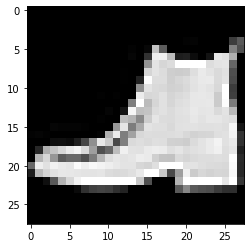

In [ ]:
# Percorrendo as imagens do loader de teste e pegando uma imagem unica

imagem = next(iter(testloader))[0][12].view(28,28)
plt.imshow(imagem, cmap='gray')

In [ ]:
imagem.shape

torch.Size([28, 28])

In [ ]:
# Formatando imagem para o shape requerido pelo pytorch

imagem = imagem.view(1, 1, 28, 28)
imagem.shape

torch.Size([1, 1, 28, 28])

In [ ]:
# Colocando a rede no modo eval e passando para gpu

net.eval()
imagem = imagem.to(device)

In [ ]:
# Realizando previsão

previsao = net.forward(imagem)

In [ ]:
# verificando respostas
# Estes valores são chamados de 'score'.

print(previsao)

tensor([[-2.5557, -2.1722, -1.4409, -3.1019, -1.4590,  0.9112, -1.3687,  0.4750,
          0.1379,  1.7897]], device='cuda:0', grad_fn=<AddmmBackward>)


In [ ]:
# Aplicando softmax nos scores para gerar as probabilidades

prob = F.softmax(previsao, dim=1)

print(prob)

tensor([[0.0064, 0.0093, 0.0194, 0.0037, 0.0191, 0.2040, 0.0209, 0.1319, 0.0942,
         0.4912]], device='cuda:0', grad_fn=<SoftmaxBackward>)


In [ ]:
# Selecionando apenas os resultados

prob = prob.cpu().detach().numpy()

print(prob)

[[0.00636814 0.00934475 0.01941762 0.00368828 0.01906908 0.20403002
  0.02087126 0.13190353 0.09415347 0.49115378]]


In [ ]:
# verificando o resultado

resultado = np.argmax(prob)

print(f'A classe predita é: {resultado}')

A classe predita é: 9
